In [70]:
import glob
import pandas as pd
import numpy.fft as fft
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [12]:
def timestamper(timestamp):
    return datetime.datetime.fromtimestamp(float(timestamp)/1000)

In [18]:
off_files = ['data/raw/IOT.TB01.2017-05-15.13:48:28.csv','data/raw/IOT.TB01.2017-05-14.19:31:46.csv']
normal_files = ['data/raw/IOT.TB01.2017-05-16.15:51:02.csv', 'data/raw/IOT.TB01.2017-05-15.13:33:10.csv']
anomaly_files = ['data/raw/IOT.TB01.2017-05-14.17:27:12.csv', 'data/raw/IOT.TB01.2017-05-14.19:16:20.csv']

# Data as independent instants
Using each file as an independent sample, we can calculate FFT on each file and don't mind about the time dependency of the files
## Motor off

filename: data/raw/IOT.TB01.2017-05-15.13:48:28.csv


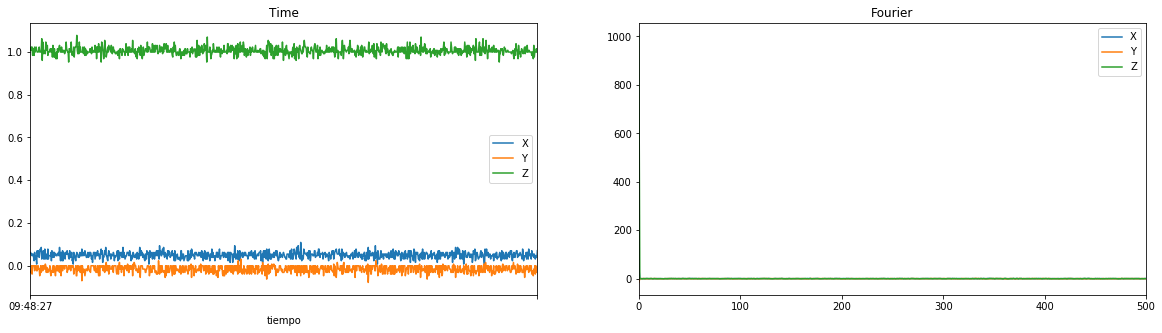

,X,Y,Z,Mean
Fourier-mean,0.012511,-0.016318,0.009594,0.001929
Fourier-std,0.343412,0.359832,0.396328,0.366524
Time-mean,0.050279,-0.015678,1.004593,0.346398
Time-std,0.014797,0.016099,0.017832,0.016243


filename: data/raw/IOT.TB01.2017-05-14.19:31:46.csv


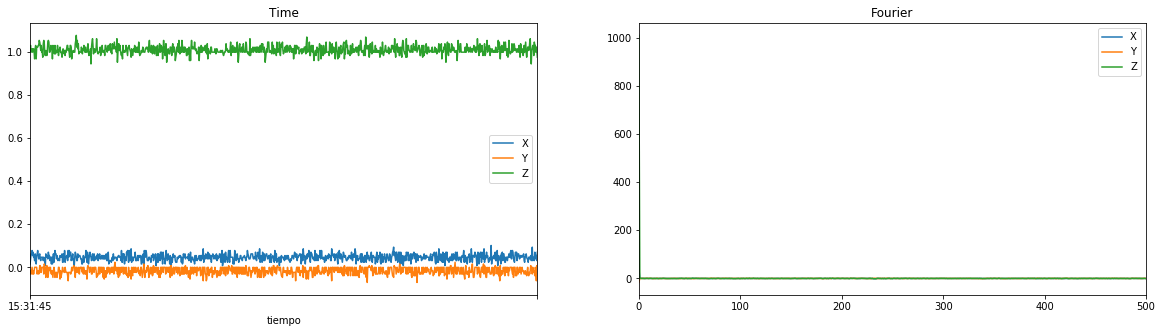

,X,Y,Z,Mean
Fourier-mean,-0.030779,0.000234,0.012152,-0.006131
Fourier-std,0.338878,0.365962,0.427983,0.377608
Time-mean,0.046433,-0.016637,1.008938,0.346245
Time-std,0.015738,0.016450,0.019544,0.017244


In [38]:
for file in off_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Time")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.legend()
    plt.show()
    
    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

When the motor is off we can see that the series in the time domain is only white noise, and has a constant mean and standard deviation close to 0. 

In the fourier domain we doesn't see any other spike than the first one (maybe the one that models the white noise process).

## Normal behavior

filename: data/raw/IOT.TB01.2017-05-16.15:51:02.csv


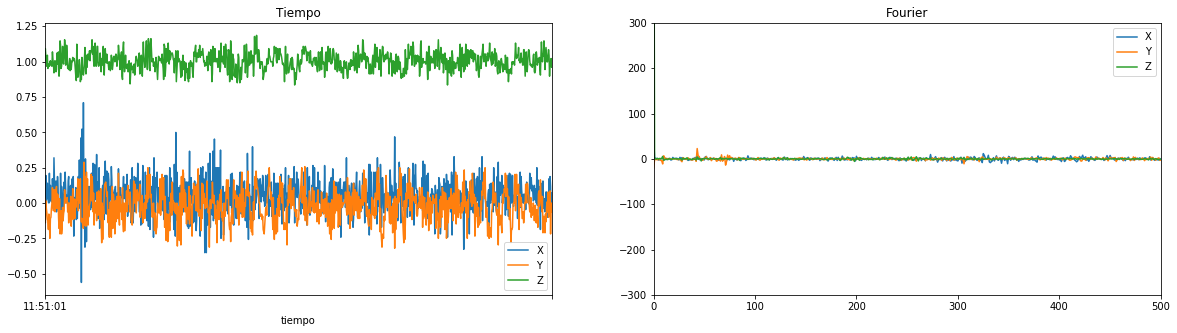

,X,Y,Z,Mean
Fourier-mean,-0.021512,0.049234,0.002512,0.010078
Fourier-std,2.785166,2.427526,1.206675,2.139789
Time-mean,0.051761,-0.020506,1.003072,0.344776
Time-std,0.122607,0.111320,0.061965,0.098631


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


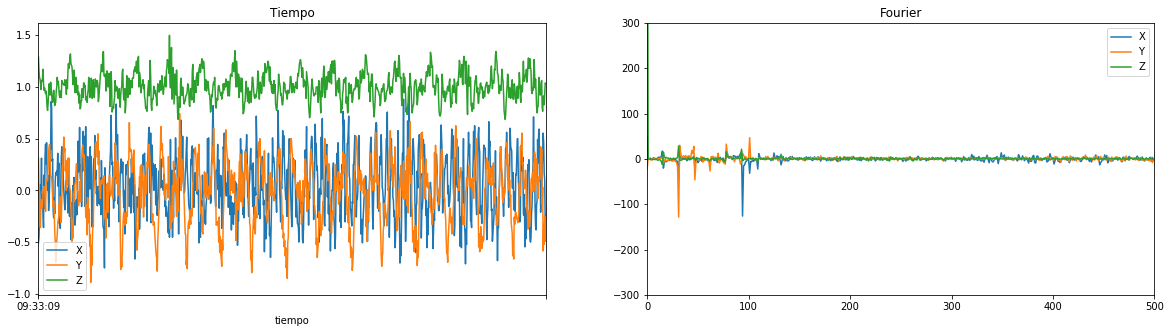

,X,Y,Z,Mean
Fourier-mean,-0.562084,0.335665,0.280691,0.018091
Fourier-std,7.565086,7.697819,2.583639,5.948848
Time-mean,0.050552,-0.021590,1.007027,0.345329
Time-std,0.296895,0.297878,0.126472,0.240415


In [41]:
for file in normal_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Tiempo")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.ylim([-300,300])
    plt.legend()
    plt.show()

    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

We can see that the Fourier domain plot has a lot more spikes other than the first one, but the spikes are smaller than a 200, and the standard deviation is small.

## Abnormal Behavior 

filename: data/raw/IOT.TB01.2017-05-14.17:27:12.csv


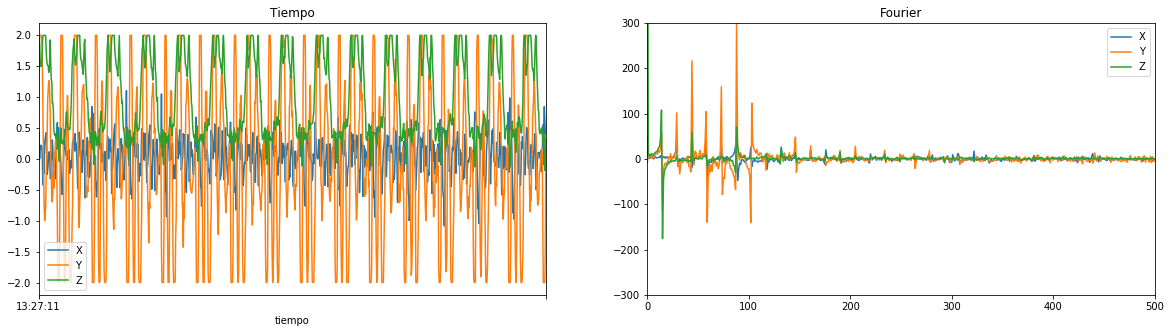

,X,Y,Z,Mean
Fourier-mean,0.182848,0.518115,0.750173,0.483712
Fourier-std,6.515387,24.910268,11.478655,14.301437
Time-mean,0.051285,-0.008276,0.996193,0.346401
Time-std,0.309759,1.267768,0.660220,0.745916


filename: data/raw/IOT.TB01.2017-05-14.19:16:20.csv


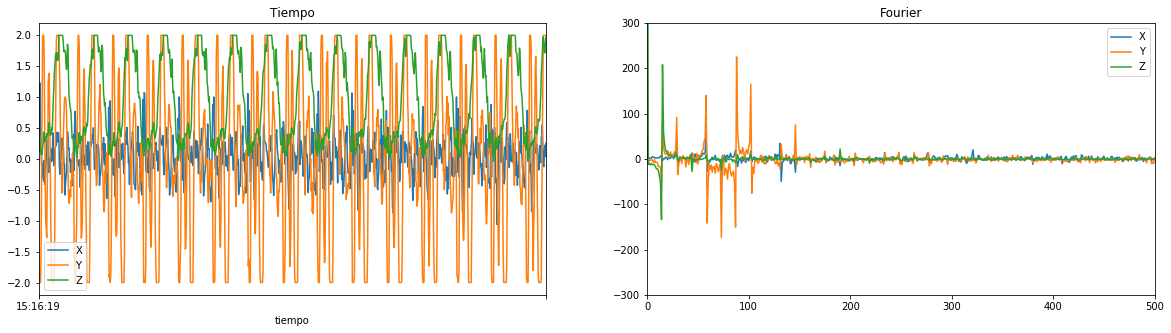

,X,Y,Z,Mean
Fourier-mean,0.793541,-1.167457,-0.653601,-0.342506
Fourier-std,6.985338,22.380982,12.503310,13.956543
Time-mean,0.051168,0.007562,0.972882,0.343871
Time-std,0.321812,1.276645,0.690883,0.763113


In [40]:
for file in anomaly_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Tiempo")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.ylim([-300,300])
    plt.legend()
    plt.show()

    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

We can see a lot more caothic series in the time domain, and bigger spikes in the Fourier domain. Also the standard deviantion is a lot higher than the normal one.

# Data as Time Series
Instead of using each file separetly, calculate the mean, standard deviantion and other statistical values and use them as a multivariate time series.

Using the assumption that each measurement is done every ~30s, we filter the data with gaps and get an continous time series.

In [52]:
df_filtered = pd.read_csv("data/filtered_statistics.csv",index_col="time")
df_filtered.index = pd.to_datetime(df_filtered.index)

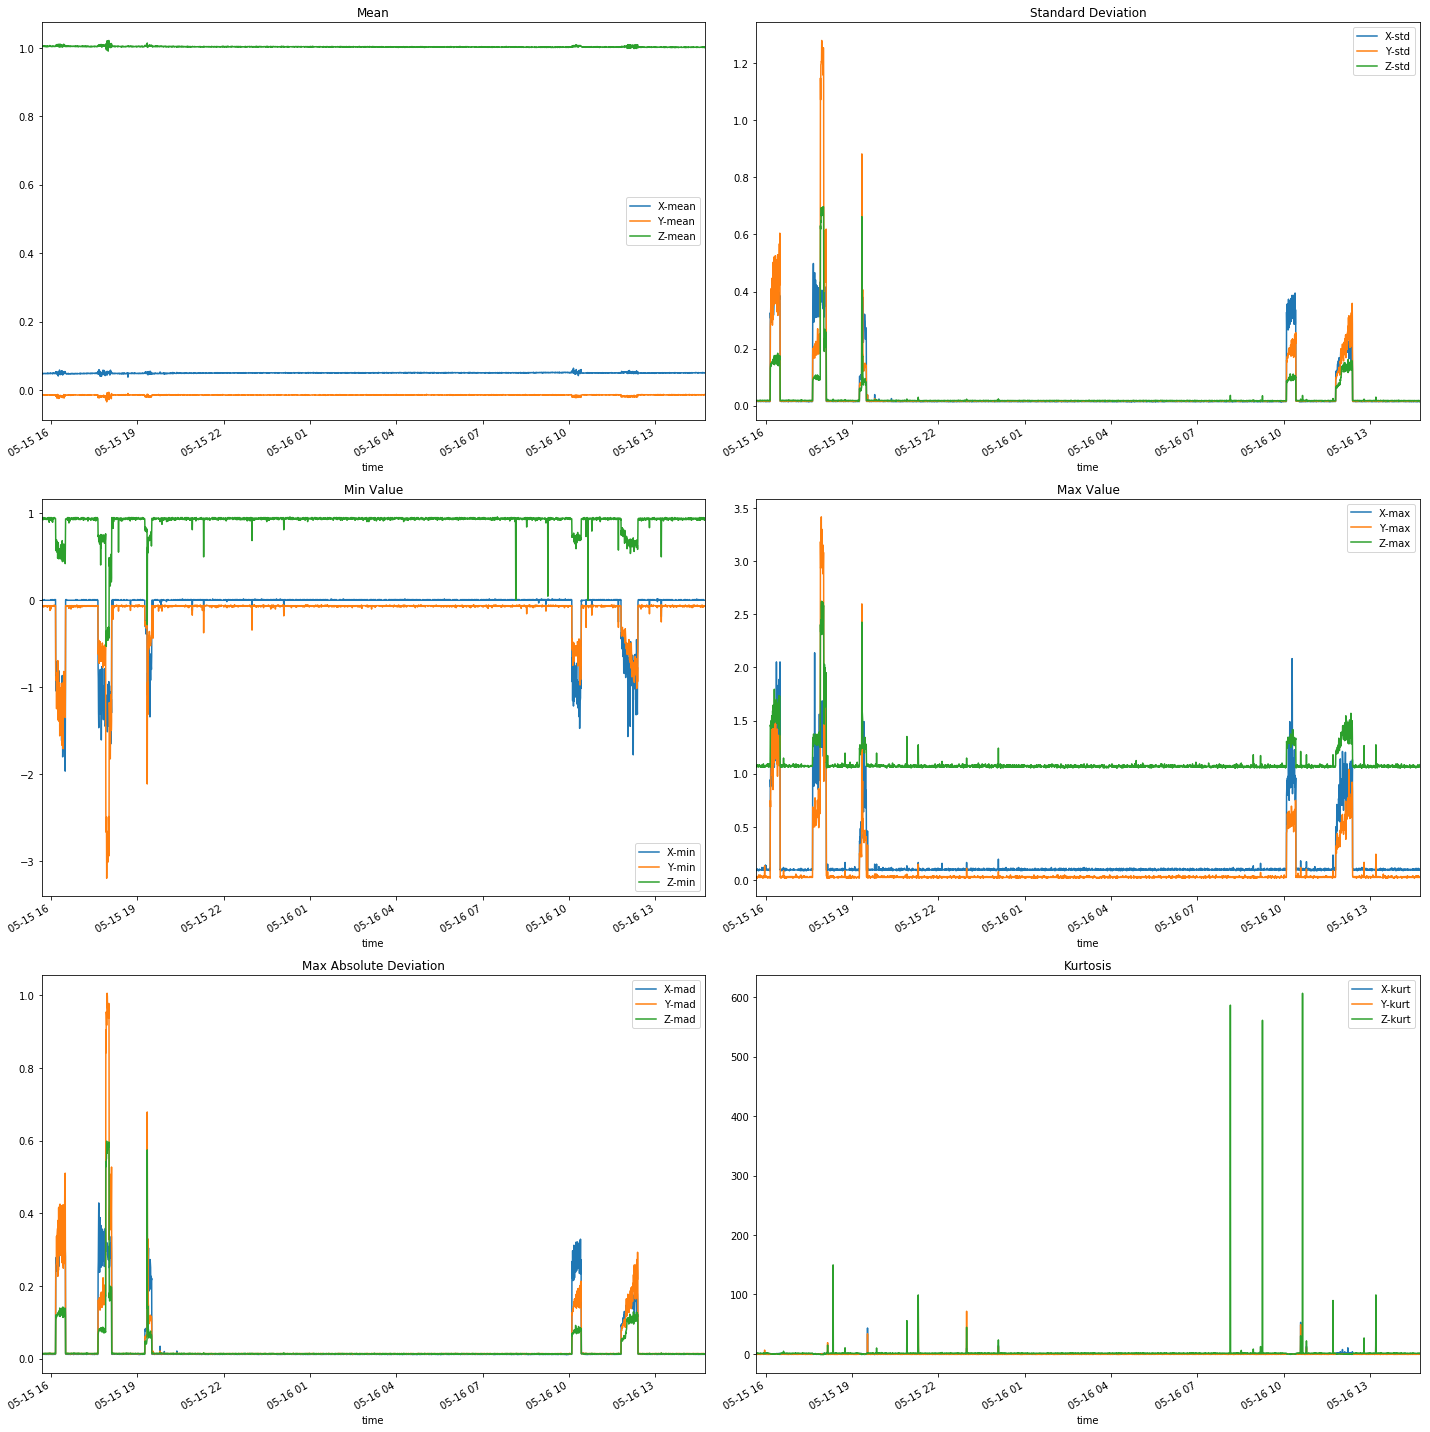

In [69]:
fig,ax = plt.subplots(3,2, figsize=(20,20))
ax = ax.ravel()
df_filtered[["X-mean","Y-mean","Z-mean"]].plot( title="Mean",ax=ax[0])
df_filtered[["X-std","Y-std","Z-std"]].plot( title="Standard Deviation",ax=ax[1])
df_filtered[["X-min","Y-min","Z-min"]].plot( title="Min Value",ax=ax[2])
df_filtered[["X-max","Y-max","Z-max"]].plot(title="Max Value",ax=ax[3])
df_filtered[["X-mad","Y-mad","Z-mad"]].plot(title="Max Absolute Deviation",ax=ax[4])
df_filtered[["X-kurt","Y-kurt","Z-kurt"]].plot(title="Kurtosis",ax=ax[5])
plt.tight_layout()
plt.show()

The most information in the first analysis is the Mean and standard deviation, the min, max and mean absolute deviation give the same information as the standard deviation.

The Kurtosis can give more information, but with mean and std we can make a good dataset.

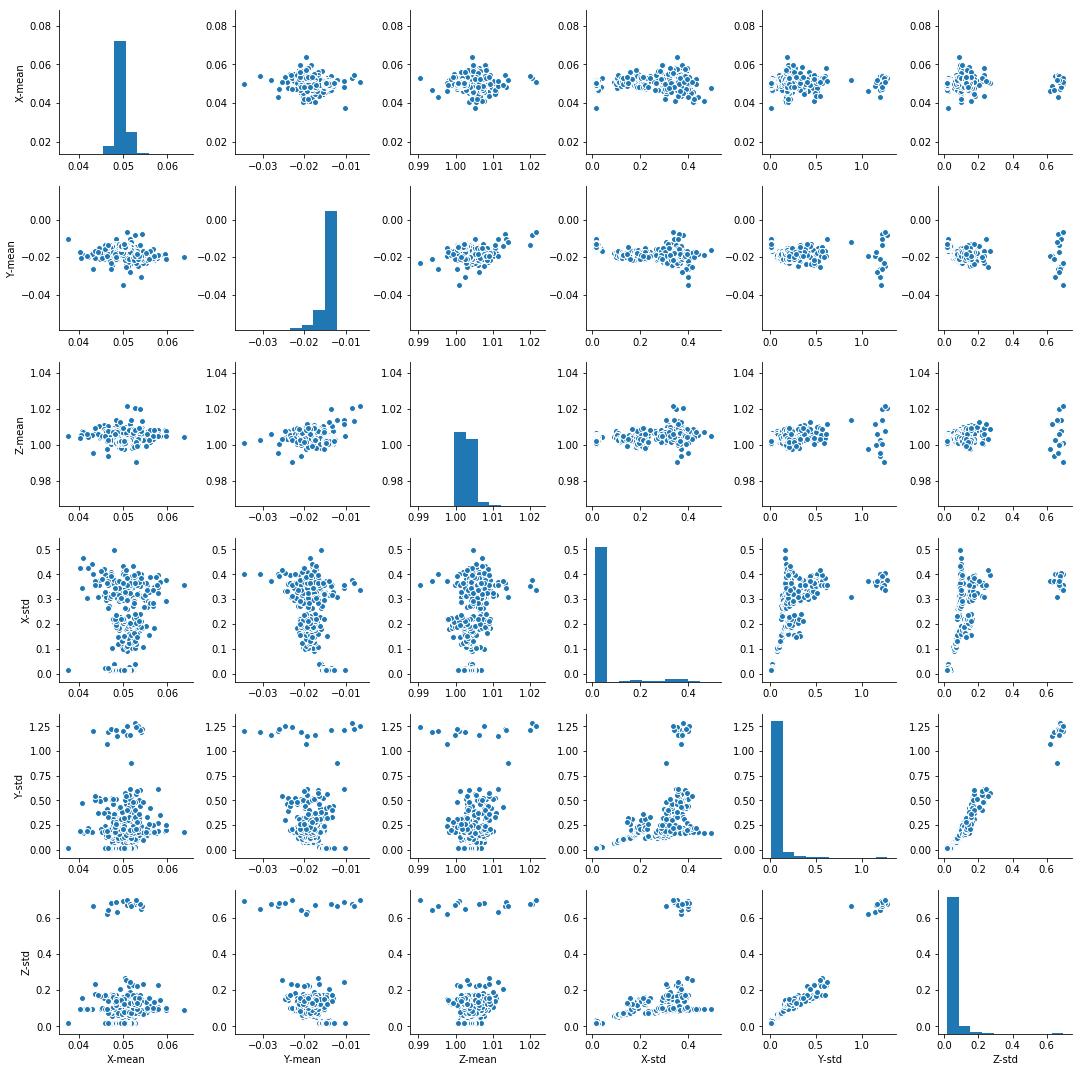

In [74]:
sns.pairplot(df_filtered[["X-mean","Y-mean","Z-mean","X-std","YT-std","Z-std"]])

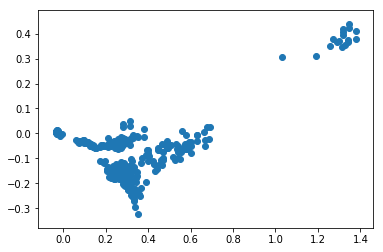

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(df_filtered[["X-mean","Y-mean","Z-mean","X-std","Y-std","Z-std"]])
plt.scatter(pca_data[:,0], pca_data[:,1])